## Import the required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset

In [2]:
combined_csv=pd.read_csv('combined_csv.csv')

#### 1. Write a Python program to display first 5 rows from COVID-19 dataset. Also print the dataset information and check the missing values 
 

In [3]:
combined_csv.head(5)

,FIPS,Country_Region,Province_State,Admin2,Latitude,Longitude,Last_Update,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio
0,NaN,Mainland China,Anhui,NaN,NaN,NaN,1/22/2020 17:00,1.0,NaN,NaN,NaN,NaN,NaN
1,NaN,Mainland China,Beijing,NaN,NaN,NaN,1/22/2020 17:00,14.0,NaN,NaN,NaN,NaN,NaN
2,NaN,Mainland China,Chongqing,NaN,NaN,NaN,1/22/2020 17:00,6.0,NaN,NaN,NaN,NaN,NaN
3,NaN,Mainland China,Fujian,NaN,NaN,NaN,1/22/2020 17:00,1.0,NaN,NaN,NaN,NaN,NaN
4,NaN,Mainland China,Gansu,NaN,NaN,NaN,1/22/2020 17:00,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
combined_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895701 entries, 0 to 895700
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   FIPS                 748915 non-null  float64       
 1   Country_Region       895701 non-null  object        
 2   Province_State       851048 non-null  object        
 3   Admin2               750308 non-null  object        
 4   Latitude             875565 non-null  float64       
 5   Longitude            875565 non-null  float64       
 6   Last_Update          895701 non-null  datetime64[ns]
 7   Confirmed            895682 non-null  float64       
 8   Deaths               895259 non-null  float64       
 9   Recovered            895310 non-null  float64       
 10  Active               887687 non-null  float64       
 11  Incident_Rate        659572 non-null  float64       
 12  Case_Fatality_Ratio  664525 non-null  float64       
dtypes: datetime64[

In [20]:
print('Null values for following columns are: ')
for i in combined_csv.columns:
    null=combined_csv[i].isnull().sum()
    print(i,null)

Null values for following columns are: 
FIPS 146786
Country_Region 0
Province_State 44653
Admin2 145393
Latitude 20136
Longitude 20136
Last_Update 0
Confirmed 19
Deaths 442
Recovered 391
Active 8014
Incident_Rate 236129
Case_Fatality_Ratio 231176


In [4]:
combined_csv.Last_Update=list(map(lambda x: pd.Timestamp.date(x),combined_csv.Last_Update))

In [5]:
combined_csv.Last_Update.min()

datetime.date(2020, 1, 22)

In [6]:
combined_csv.Last_Update=combined_csv.Last_Update.astype('datetime64[ns]')

#### 2. Write a Python program to get the latest number of confirmed, deaths, recovered and active cases of Novel Coronavirus (COVID-19) Country wise. 


In [3]:
combined_csv['Last_Update']= pd.to_datetime(combined_csv['Last_Update'])
combined_csv.Last_Update.min()

Timestamp('2020-01-22 17:00:00')

In [113]:
pd.pivot_table(data=combined_csv[combined_csv.Last_Update==combined_csv.Last_Update.max()],
               index=['Country_Region'],
               columns=['Last_Update'], 
               values=['Confirmed', 'Deaths', 'Recovered','Active' ], 
               aggfunc=np.sum)

,Active,Confirmed,Deaths,Recovered
Last_Update,2020-11-18 05:40:31,2020-11-18 05:40:31,2020-11-18 05:40:31,2020-11-18 05:40:31
Country_Region,,,,
Afghanistan,6830.0,43628.0,1638.0,35160.0
Albania,14685.0,29126.0,637.0,13804.0
Algeria,22257.0,69591.0,2186.0,45148.0
Andorra,910.0,5951.0,76.0,4965.0
Angola,6908.0,13818.0,328.0,6582.0
...,...,...,...,...
West Bank and Gaza,8671.0,64935.0,580.0,55684.0
Western Sahara,1.0,10.0,1.0,8.0


#### 3. Write a Python program to get the latest number of confirmed deaths and recovered people of Novel Coronavirus (COVID-19) cases Country/Region - Province/State wise. 


In [114]:
pd.pivot_table(data=combined_csv[combined_csv.Last_Update==combined_csv.Last_Update.max()],
               index=['Country_Region', 'Province_State'],
               columns=['Last_Update'], 
               values=['Confirmed', 'Deaths', 'Recovered'], 
               aggfunc=np.sum)

Confirmed  \
Last_Update                                 2020-11-18 05:40:31   
Country_Region Province_State                                     
Australia      Australian Capital Territory               115.0   
               New South Wales                           4509.0   
               Northern Territory                          46.0   
               Queensland                                1187.0   
               South Australia                            551.0   
...                                                         ...   
United Kingdom Northern Ireland                         47711.0   
               Scotland                                 83259.0   
               Turks and Caicos Islands                   720.0   
               Unknown                                      0.0   
               Wales                                    67811.0   

                                                         Deaths  \
Last_Update                                 2020-11-18 05:40:31   
Country_Region Province_State                                     
Australia      Australian Capital Territory                 3.0   
               New South Wales                             53.0   
               Northern Territory                           0.0   
               Queensland                                   6.0   
               South Australia                              4.0   
...                                                         ...   
United Kingdom Northern Ireland                           878.0   
               Scotland                                  3323.0   
               Turks and Caicos Islands                     6.0   
               Unknown                                      0.0   
               Wales                                     2243.0   

                                                      Recovered  
Last_Update                                 2020-11-18 05:40:31  
Country_Region Province_State                                    
Australia      Australian Capital Territory               111.0  
               New South Wales                           3167.0  
               Northern Territory                          38.0  
               Queensland                                1171.0  
               South Australia                            511.0  
...                                                         ...  
United Kingdom Northern Ireland                             0.0  
               Scotland                                     0.0  
               Turks and Caicos Islands                   695.0  
               Unknown                                      0.0  
               Wales                                        0.0  

[586 rows x 3 columns]

#### 4. Write a Python program to get the Chinese province wise cases of confirmed, deaths and recovered cases of Novel Coronavirus (COVID-19). 

In [117]:
pd.pivot_table(data=combined_csv[combined_csv.Country_Region=='China'],
               index=['Province_State'],
               columns=['Country_Region'], 
               values=['Confirmed', 'Deaths', 'Recovered'], 
               aggfunc=np.sum)

,Confirmed,Deaths,Recovered
Country_Region,China,China,China
Province_State,,,
Anhui,249711.0,1512.0,248176.0
Beijing,199531.0,2222.0,181922.0
Chongqing,146704.0,1512.0,144875.0
Fujian,94317.0,252.0,91185.0
Gansu,39554.0,504.0,38019.0
Guangdong,423674.0,2016.0,413878.0
Guangxi,64433.0,504.0,63744.0
Guizhou,37006.0,504.0,36477.0


#### 5. Write a Python program to get the latest country wise deaths cases of Novel Coronavirus (COVID-19).  

In [118]:
pd.pivot_table(data=combined_csv[combined_csv.Last_Update==combined_csv.Last_Update.max()],
               index=['Country_Region'],
               columns=['Last_Update'], 
               values=['Deaths'], 
               aggfunc=np.sum)

,Deaths
Last_Update,2020-11-18 05:40:31
Country_Region,
Afghanistan,1638.0
Albania,637.0
Algeria,2186.0
Andorra,76.0
Angola,328.0
...,...
West Bank and Gaza,580.0
Western Sahara,1.0


#### 6. Write a Python program to list countries with no cases of Novel Coronavirus (COVID-19) recovered. 

In [130]:
combined_csv[combined_csv.Recovered==0.0].Country_Region.nunique()

225

In [132]:
combined_csv[combined_csv.Recovered==0.0].Country_Region.value_counts().index

Index(['US', 'Peru', 'Sweden', 'Netherlands', 'Canada', 'United Kingdom',
       'Chile', 'Brazil', 'Spain', 'India',
       ...
       'Curacao', 'Republic of Ireland', 'St. Martin', 'Channel Islands',
       ' Azerbaijan', 'Saint Martin', 'North Ireland', 'Cape Verde',
       'Republic of Moldova', 'East Timor'],
      dtype='object', length=225)

#### 7. Write a Python program to list countries with all cases of Novel Coronavirus (COVID-19) died.  

In [138]:
combined_csv[combined_csv.Confirmed==combined_csv.Deaths].Country_Region.value_counts().index

Index(['US', 'India', 'Spain', 'Peru', 'United Kingdom', 'Canada', 'Colombia',
       'Chile', 'Australia', 'Brazil', 'France', 'Japan', 'Mexico',
       'occupied Palestinian territory', 'Sudan', 'Guernsey', 'Puerto Rico',
       'Jersey', 'Mainland China', 'Republic of the Congo', 'Guam',
       'The Gambia', 'Guyana', 'Greenland', 'The Bahamas', 'Iraq', 'Iran'],
      dtype='object')

#### 8. Write a Python program to list countries with all cases of Novel Coronavirus (COVID-19) recovered.  

In [139]:
combined_csv[combined_csv.Confirmed==combined_csv.Recovered].Country_Region.value_counts().index

Index(['US', 'China', 'Canada', 'Japan', 'United Kingdom', 'France', 'India',
       'Denmark', 'Spain', 'Australia', 'Colombia', 'Holy See',
       'Saint Kitts and Nevis', 'Timor-Leste', 'Grenada', 'Dominica', 'Chile',
       'Saint Lucia', 'Netherlands', 'Mainland China',
       'Saint Vincent and the Grenadines', 'Papua New Guinea', 'Laos',
       'Seychelles', 'Nepal', 'Cambodia', 'Sri Lanka', 'Fiji', 'Eritrea',
       'Russia', 'Finland', 'Western Sahara', 'Belgium', 'Vietnam',
       'occupied Palestinian territory', 'Republic of the Congo',
       'Puerto Rico', 'Jersey', 'Guernsey', 'Yemen', 'The Gambia', 'Macau',
       'Marshall Islands', 'Guam', 'The Bahamas', 'Andorra', 'Greenland',
       'Egypt', 'Jordan', 'Solomon Islands', 'Iraq', 'Gibraltar', 'Macao SAR'],
      dtype='object')

#### 9. Write a Python program to get the top 10 countries data (Last Update, Country/Region, Confirmed, Deaths, Recovered) of Novel Coronavirus(COVID-19).  

In [23]:
countries=combined_csv.Country_Region.value_counts()[0:10]
lst=list(countries.index)
lst# top 10 countries according to count

['US',
 'Russia',
 'Japan',
 'China',
 'India',
 'Colombia',
 'Mexico',
 'Brazil',
 'Ukraine',
 'Peru']

In [28]:
combined_csv[combined_csv.Country_Region.isin(lst)]


,FIPS,Country_Region,Province_State,Admin2,Latitude,Longitude,Last_Update,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio
31,NaN,US,Washington,NaN,NaN,NaN,2020-01-22 17:00:00,1.0,NaN,NaN,NaN,NaN,NaN
35,NaN,Japan,NaN,NaN,NaN,NaN,2020-01-22 17:00:00,2.0,NaN,NaN,NaN,NaN,NaN
69,NaN,US,Washington,NaN,NaN,NaN,2020-01-23 17:00:00,1.0,NaN,NaN,NaN,NaN,NaN
73,NaN,Japan,NaN,NaN,NaN,NaN,2020-01-23 17:00:00,1.0,NaN,NaN,NaN,NaN,NaN
81,NaN,Mexico,NaN,NaN,NaN,NaN,2020-01-23 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
895670,NaN,Ukraine,Vinnytsia Oblast,NaN,49.2331,28.4682,2020-11-18 05:40:31,14103.0,242.0,8146.0,5715.0,903.810192,1.715947
895671,NaN,Ukraine,Volyn Oblast,NaN,50.7472,25.3254,2020-11-18 05:40:31,19297.0,367.0,12428.0,6502.0,1863.850173,1.901850
895672,NaN,Ukraine,Zakarpattia Oblast,NaN,48.6208,22.2879,2020-11-18 05:40:31,19826.0,474.0,9140.0,10212.0,1577.495898,2.390800
895673,NaN,Ukraine,Zaporizhia Oblast,NaN,47.8388,35.1396,2020-11-18 05:40:31,20025.0,176.0,3085.0,16764.0,1173.911208,0.878901


In [30]:
pv9=pd.pivot_table(data=combined_csv[combined_csv.Country_Region.isin(lst)],
               index=['Country_Region', 'Last_Update'], 
               values=['Deaths', 'Confirmed', 'Recovered'], 
               aggfunc=np.sum)
pv9 

Confirmed   Deaths  Recovered
Country_Region Last_Update                                       
Brazil         2020-01-23 17:00:00        0.0      0.0        0.0
               2020-02-26 23:53:02        3.0      0.0        0.0
               2020-02-29 21:03:05        8.0      0.0        0.0
               2020-03-04 20:33:02        8.0      0.0        0.0
               2020-03-06 20:33:03       26.0      0.0        0.0
...                                       ...      ...        ...
Ukraine        2020-11-14 05:25:37   527808.0   9604.0   243901.0
               2020-11-15 05:26:53   540593.0   9806.0   249127.0
               2020-11-16 05:25:57   551533.0   9904.0   251864.0
               2020-11-17 05:25:54   561581.0  10002.0   254653.0
               2020-11-18 05:40:31   573758.0  10168.0   261836.0

[3523 rows x 3 columns]

#### 10. Write a Python program to create a plot (lines) of total deaths, confirmed, recovered and active cases Country wise where deaths greater than 150. 

In [25]:
pv10=pd.pivot_table(data=combined_csv[combined_csv.Deaths>150],
               index=['Country_Region'], 
               values=['Deaths', 'Confirmed', 'Recovered','Active'], 
               aggfunc=np.sum)
pv10 

,Active,Confirmed,Deaths,Recovered
Country_Region,,,,
Afghanistan,1772456.0,6294647.0,209797.0,4312394.0
Albania,654587.0,1536113.0,41040.0,840486.0
Algeria,1835326.0,6689648.0,265788.0,4588434.0
Angola,270872.0,496919.0,14384.0,211663.0
Argentina,17255963.0,83155631.0,2035338.0,63864330.0
...,...,...,...,...
Venezuela,915720.0,7221162.0,61000.0,6244442.0
West Bank and Gaza,632185.0,3460095.0,28716.0,2799194.0
Yemen,41105.0,280812.0,80190.0,159517.0


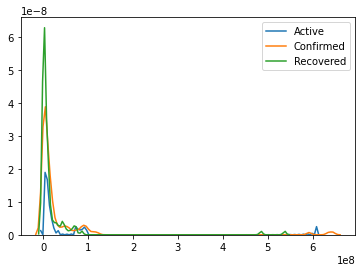

In [169]:
sns.kdeplot(pv10.Active)
sns.kdeplot(pv10.Confirmed)
#sns.kdeplot(pv10.Deaths)
sns.kdeplot(pv10.Recovered)

<BarContainer object of 114 artists>

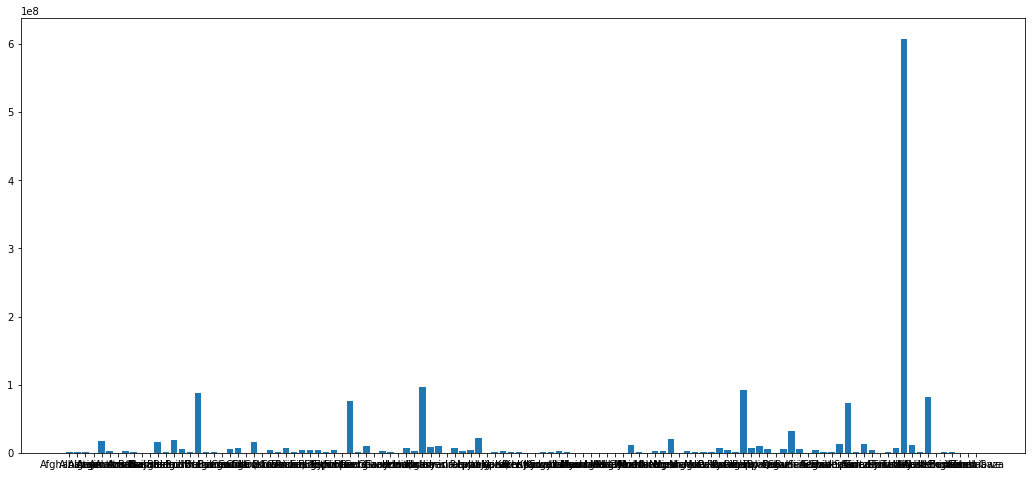

In [170]:
plt.figure(figsize=(18,8))
plt.bar(x=pv10.index, height='Active', data=pv10)

#### 11. Write a Python program to visualize the state/province wise death cases of Novel Coronavirus (COVID-19) in USA. 

In [146]:
pv11=pd.pivot_table(data=combined_csv[combined_csv.Country_Region=='US'],
               index=['Province_State'], 
               values=['Deaths'], 
               aggfunc=np.sum)
pv11[pv11.Deaths>0.0]

,Deaths
Province_State,
Alabama,349063.0
Alaska,7277.0
Arizona,726084.0
Arkansas,159513.0
California,2132577.0
...,...
Virginia,477117.0
Washington,357753.0
West Virginia,43126.0


<BarContainer object of 63 artists>

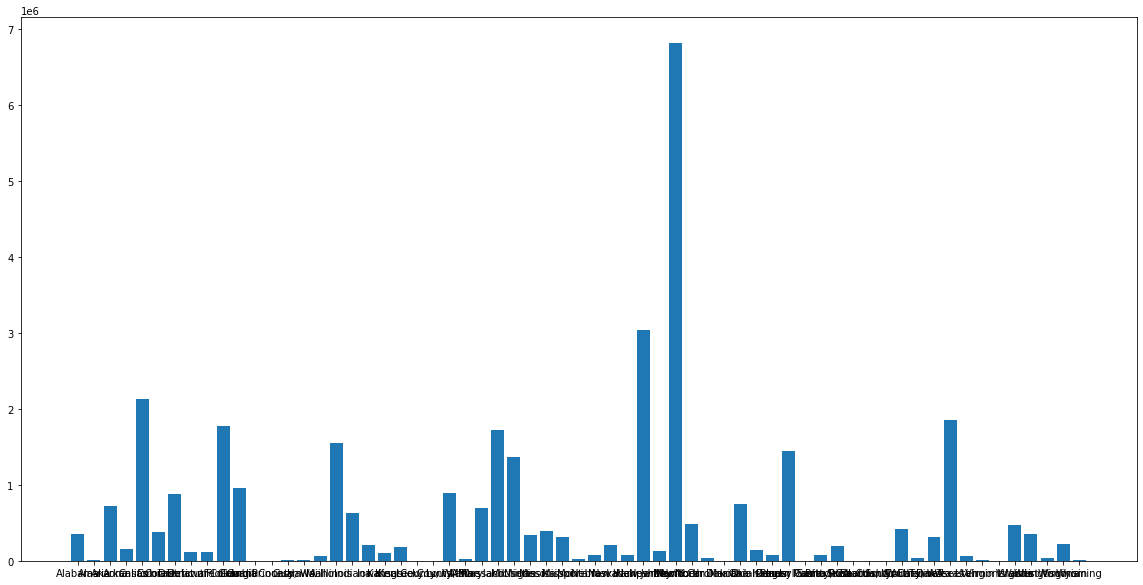

In [147]:
plt.figure(figsize=(20,10))
plt.bar(x=pv11[pv11.Deaths>0.0].index, height='Deaths', data=pv11[pv11.Deaths>0.0])

#### 12. Write a Python program to visualize the state/province wise Active cases of Novel Coronavirus (COVID-19) in USA. 

In [129]:
pv12=pd.pivot_table(data=combined_csv[combined_csv.Country_Region=='US'],
               index=['Province_State'], 
               values=['Active'], 
               aggfunc=np.sum)
pv12

,Active
Province_State,
"Norfolk County, MA",0.0
Alabama,19120420.0
"Alameda County, CA",0.0
Alaska,1103918.0
American Samoa,0.0
...,...
"Williamson County, TN",0.0
Wisconsin,17113373.0
Wuhan Evacuee,0.0


In [132]:
pv12.dropna(inplace=True)
pv12[pv12.Active>0.0]

,Active
Province_State,
Alabama,19120420.0
Alaska,1103918.0
Arizona,29053689.0
Arkansas,10337972.0
California,103268971.0
Colorado,11100267.0
Connecticut,10056637.0
Delaware,3141601.0
Diamond Princess,10780.0


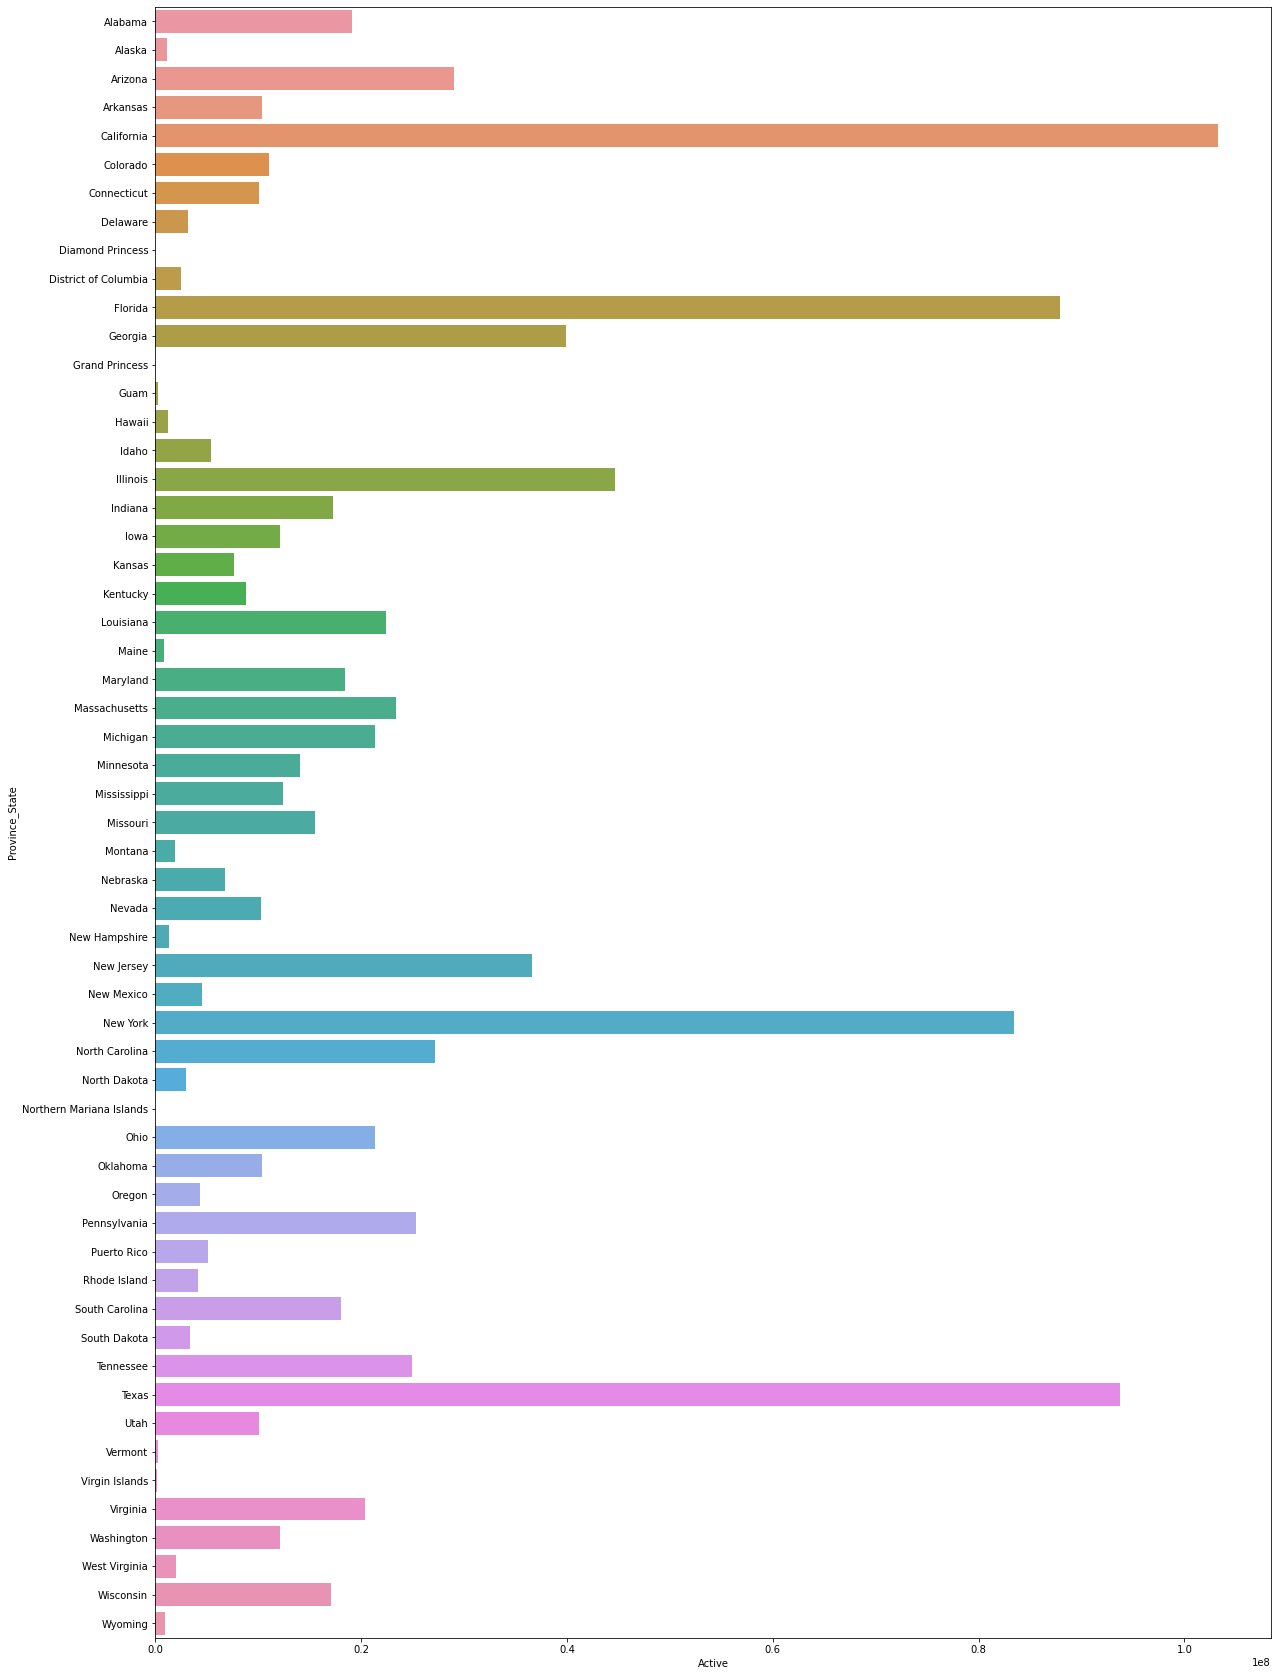

In [134]:
plt.figure(figsize=(20,30))
splot=sns.barplot(y=pv12[pv12.Active>0.0].index, x='Active', data=pv12[pv12.Active>0.0], orient='h')

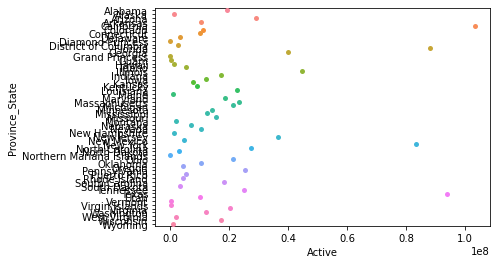

In [133]:
sns.stripplot(y=pv12[pv12.Active>0.0].index, x='Active', data=pv12[pv12.Active>0.0])

#### 13. Write a Python program to visualize the state/province wise combine number of confirmed, deaths, recovered, active Novel Coronavirus (COVID-19) cases in USA.  

In [59]:
df13=combined_csv[combined_csv.Country_Region=='US']
df13['All']=df13.Confirmed+df13.Recovered+df13.Deaths+df13.Active
df13

<ipython-input-59-13bd86cbfa00>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df13['All']=df13.Confirmed+df13.Recovered+df13.Deaths+df13.Active


,FIPS,Country_Region,Province_State,Admin2,Latitude,Longitude,Last_Update,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio,All
31,NaN,US,Washington,NaN,NaN,NaN,2020-01-22,1.0,NaN,NaN,NaN,NaN,NaN,NaN
69,NaN,US,Washington,NaN,NaN,NaN,2020-01-23,1.0,NaN,NaN,NaN,NaN,NaN,NaN
117,NaN,US,Washington,NaN,NaN,NaN,2020-01-24,1.0,NaN,NaN,NaN,NaN,NaN,NaN
118,NaN,US,Chicago,NaN,NaN,NaN,2020-01-24,1.0,NaN,NaN,NaN,NaN,NaN,NaN
158,NaN,US,Washington,NaN,NaN,NaN,2020-01-25,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895642,56039.0,US,Wyoming,Teton,43.935225,-110.589080,2020-11-18,1252.0,2.0,0.0,1250.0,5335.833617,0.159744,2504.0
895643,56041.0,US,Wyoming,Uinta,41.287818,-110.547578,2020-11-18,796.0,4.0,0.0,792.0,3935.528528,0.502513,1592.0
895644,90056.0,US,Wyoming,Unassigned,NaN,NaN,2020-11-18,0.0,0.0,0.0,0.0,NaN,NaN,0.0
895645,56043.0,US,Wyoming,Washakie,43.904516,-107.680187,2020-11-18,253.0,7.0,0.0,246.0,3241.511851,2.766798,506.0


In [73]:
pv13=pd.pivot_table(data=df13,
               index=['Province_State'], 
               values=['All'], 
               aggfunc=np.sum)
pv13[pv13.All!=0.0]

,All
Province_State,
Alabama,39111974.0
Alaska,2225122.0
Arizona,59593033.0
Arkansas,21007988.0
California,211018486.0
Colorado,23023574.0
Connecticut,21972786.0
Delaware,6513518.0
Diamond Princess,22589.0


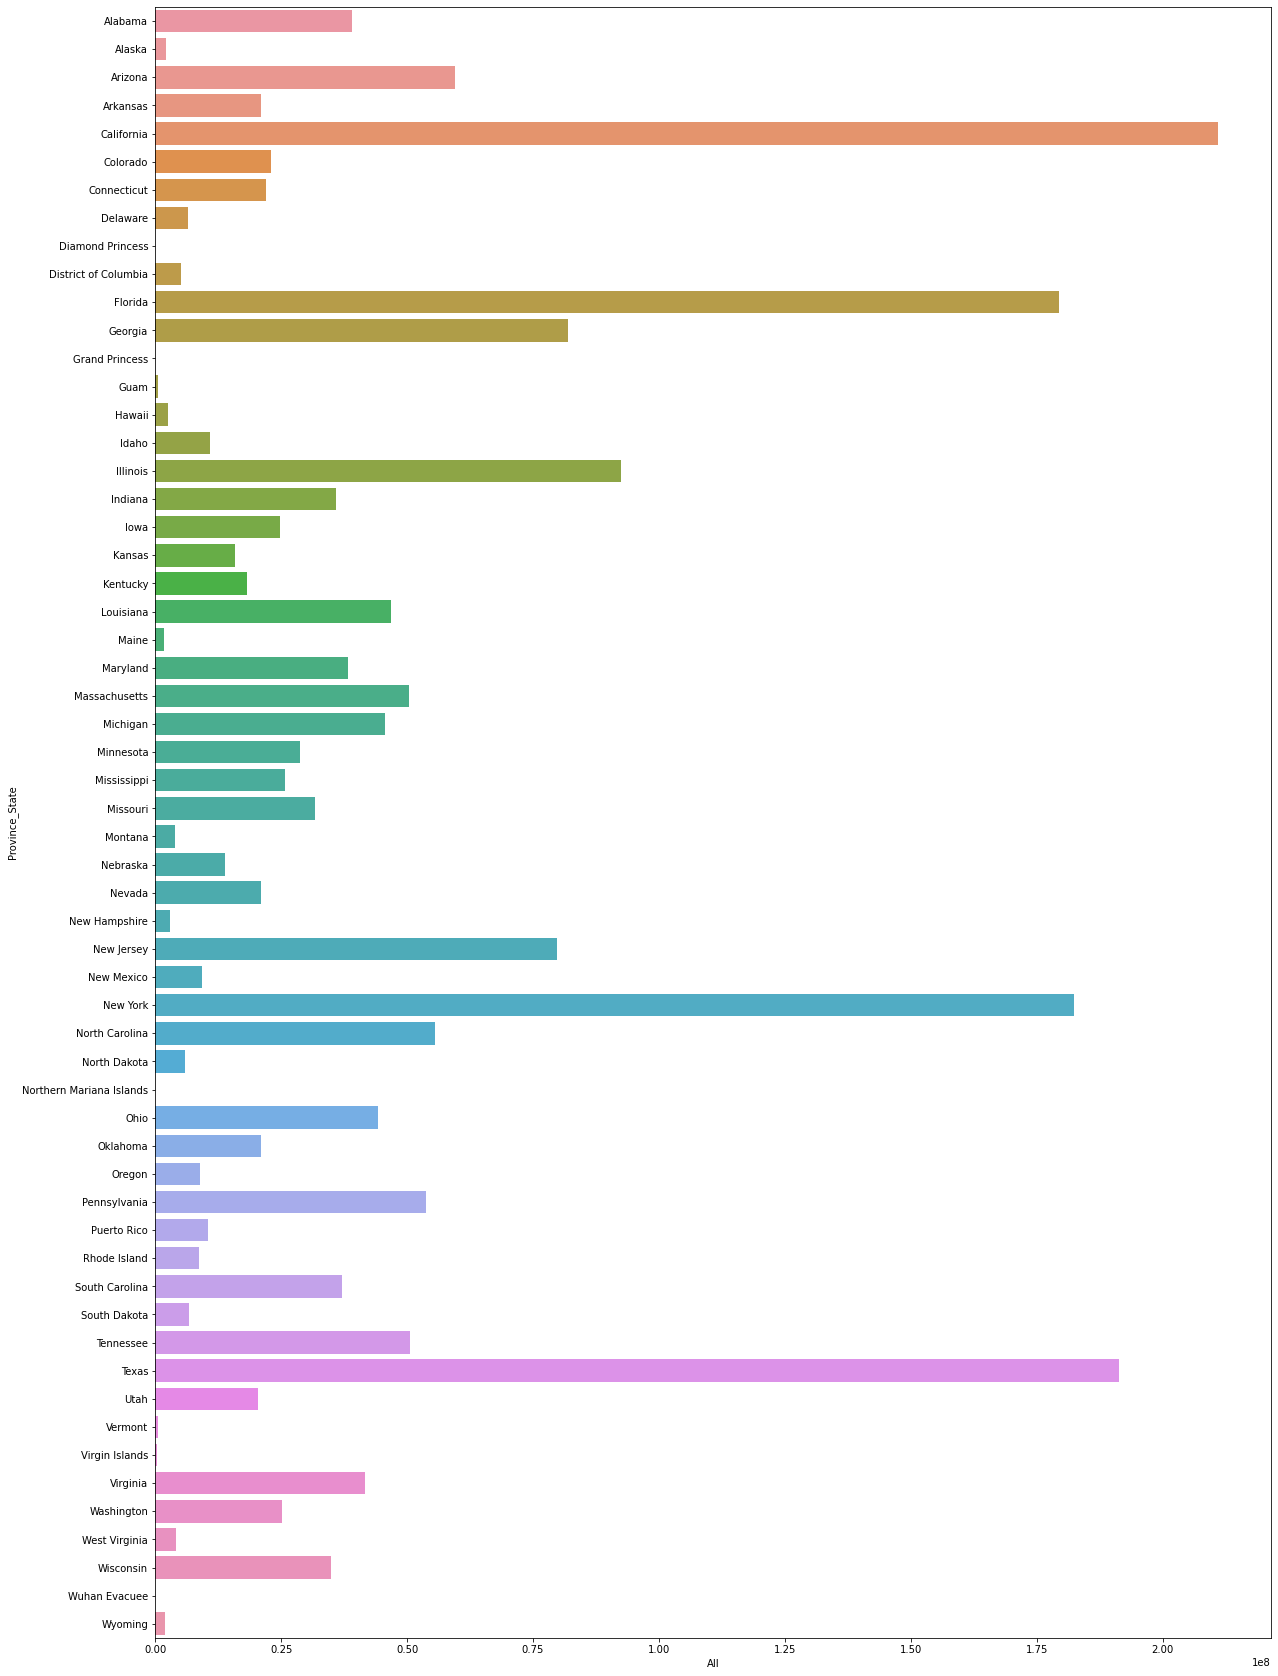

In [93]:
plt.figure(figsize=(20,30))
splot=sns.barplot(y=pv13[pv13.All>0].index, x='All', data=pv13[pv13.All>0], orient='h')



#### 14. Write a Python program to visualize Worldwide Confirmed Novel Coronavirus (COVID-19) cases over time.

In [13]:
pv14=pd.pivot_table(data=combined_csv,
               index='Last_Update' ,
               values=['Confirmed'], 
               aggfunc=np.sum)
pv14

,Confirmed
Last_Update,
2020-01-22,555.0
2020-01-23,653.0
2020-01-24,941.0
2020-01-25,1438.0
2020-01-26,2118.0
...,...
2020-11-14,53421720.0
2020-11-15,54015537.0
2020-11-16,54485793.0


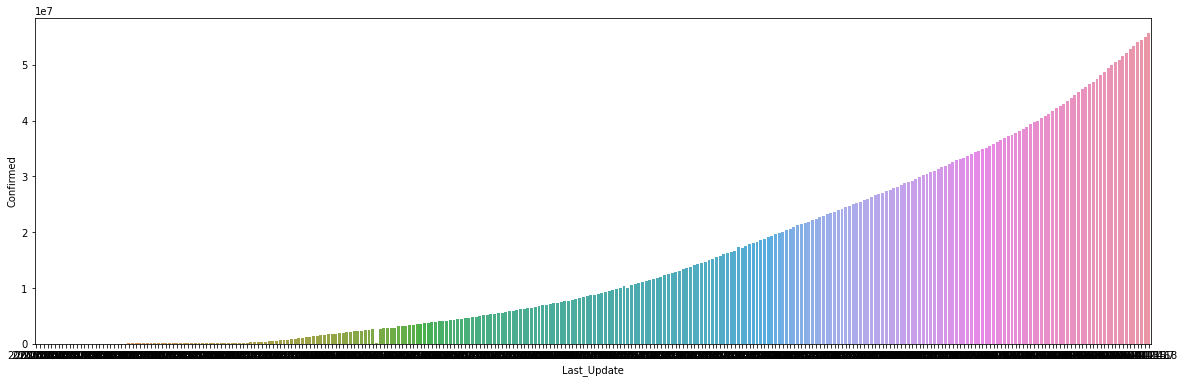

In [22]:
plt.figure(figsize=(20,6))
sns.barplot(x=pv14.index, y=pv14.Confirmed)

In [14]:
pv14_1=pd.pivot_table(data=pv14,
               index=pv14.index.month ,
               values=['Confirmed'], 
               aggfunc=np.sum)
pv14_1

,Confirmed
Last_Update,
1,3.876100e+04
2,1.674071e+06
3,8.945544e+06
4,6.009240e+07
5,1.418599e+08
6,2.422703e+08
7,4.244612e+08
8,6.631774e+08
9,8.849890e+08


Text(0.5, 1.0, 'Worldwide Confirmed Covid-19 cases')

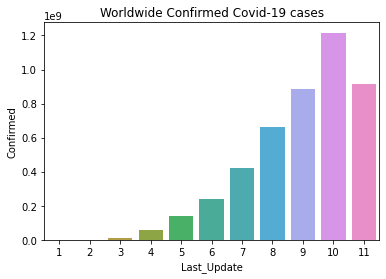

In [57]:
sns.barplot(x=pv14_1.index, y=pv14_1.Confirmed)
plt.title('Worldwide Confirmed Covid-19 cases')

## extra graphs

In [174]:
import geopandas as gpd

In [184]:
gdf = gpd.GeoDataFrame(
    combined_csv[-100:-1], geometry=gpd.points_from_xy(combined_csv[-100:-1].Longitude, 
                                                           combined_csv[-100:-1].Latitude))

In [186]:
gdf

,FIPS,Country_Region,Province_State,Admin2,Latitude,Longitude,Last_Update,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio,geometry
895601,55101.0,US,Wisconsin,Racine,42.747531,-88.059413,2020-11-18,12987.0,143.0,0.0,12844.0,6615.523328,1.101101,POINT (-88.05941 42.74753)
895602,55103.0,US,Wisconsin,Richland,43.376278,-90.430127,2020-11-18,751.0,10.0,0.0,741.0,4353.118479,1.331558,POINT (-90.43013 43.37628)
895603,55105.0,US,Wisconsin,Rock,42.671516,-89.071479,2020-11-18,8294.0,62.0,0.0,8232.0,5077.316748,0.747528,POINT (-89.07148 42.67152)
895604,55107.0,US,Wisconsin,Rusk,45.474989,-91.133301,2020-11-18,651.0,5.0,0.0,646.0,4591.620821,0.768049,POINT (-91.13330 45.47499)
895605,55111.0,US,Wisconsin,Sauk,43.425741,-89.949661,2020-11-18,3069.0,11.0,0.0,3058.0,4762.422023,0.358423,POINT (-89.94966 43.42574)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895695,NaN,Vietnam,NaN,NaN,14.058324,108.277199,2020-11-18,1288.0,35.0,1124.0,129.0,1.323216,2.717391,POINT (108.27720 14.05832)
895696,NaN,West Bank and Gaza,NaN,NaN,31.952200,35.233200,2020-11-18,64935.0,580.0,55684.0,8671.0,1272.881882,0.893201,POINT (35.23320 31.95220)
895697,NaN,Western Sahara,NaN,NaN,24.215500,-12.885800,2020-11-18,10.0,1.0,8.0,1.0,1.674116,10.000000,POINT (-12.88580 24.21550)
895698,NaN,Yemen,NaN,NaN,15.552727,48.516388,2020-11-18,2081.0,607.0,1410.0,64.0,6.977142,29.168669,POINT (48.51639 15.55273)


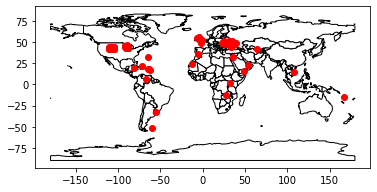

In [203]:
#plt.figure(figsize=(20,10))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

ax = world.plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()

In [191]:
world.name='United States of America'

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


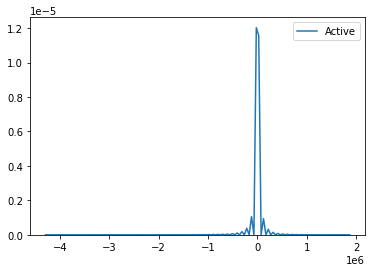

In [8]:
sns.kdeplot(combined_csv.Active)

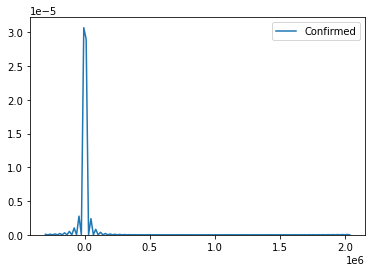

In [9]:
sns.kdeplot(combined_csv.Confirmed)

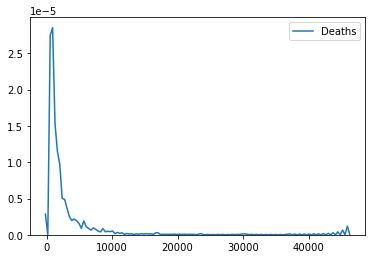

In [10]:
sns.kdeplot(combined_csv.Deaths)

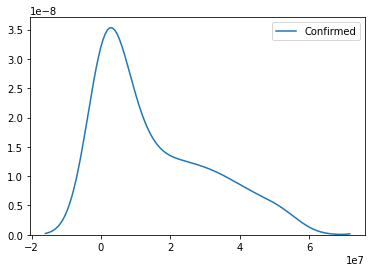

In [16]:
sns.kdeplot(pv14.Confirmed)

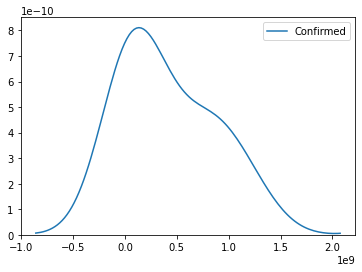

In [17]:
sns.kdeplot(pv14_1.Confirmed)

In [18]:
combined_csv.Confirmed.corr(combined_csv.Deaths)

0.7921968593451038

In [20]:
combined_csv.dtypes

FIPS                          float64
Country_Region                 object
Province_State                 object
Admin2                         object
Latitude                      float64
Longitude                     float64
Last_Update            datetime64[ns]
Confirmed                     float64
Deaths                        float64
Recovered                     float64
Active                        float64
Incident_Rate                 float64
Case_Fatality_Ratio           float64
dtype: object

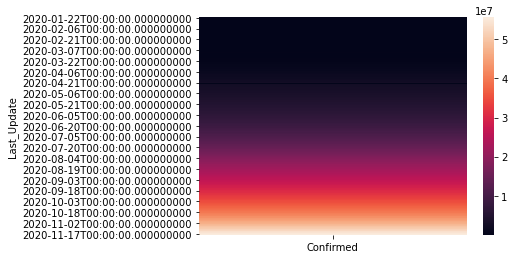

In [33]:
sns.heatmap(pv14)

In [27]:
pv14

,Confirmed
Last_Update,
2020-01-22,555.0
2020-01-23,653.0
2020-01-24,941.0
2020-01-25,1438.0
2020-01-26,2118.0
...,...
2020-11-14,53421720.0
2020-11-15,54015537.0
2020-11-16,54485793.0
